In [118]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('adult.csv')
df.head(6)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


### Rename the columns.

In [120]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [121]:
z_cols = ['Age','Workclass', 'Fnlwgt', 'Education', 'education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df.columns = z_cols

In [122]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### Remove handle null values (if any).

In [123]:
# Check for Null Data
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Visualizing the data

In [124]:
for col in ['Workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)


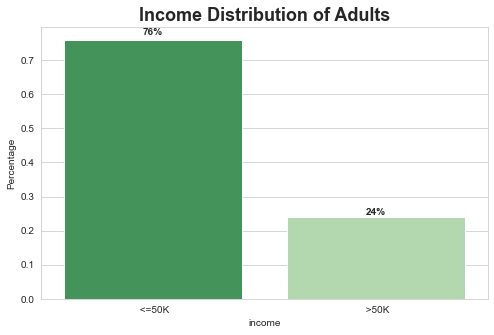

In [125]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

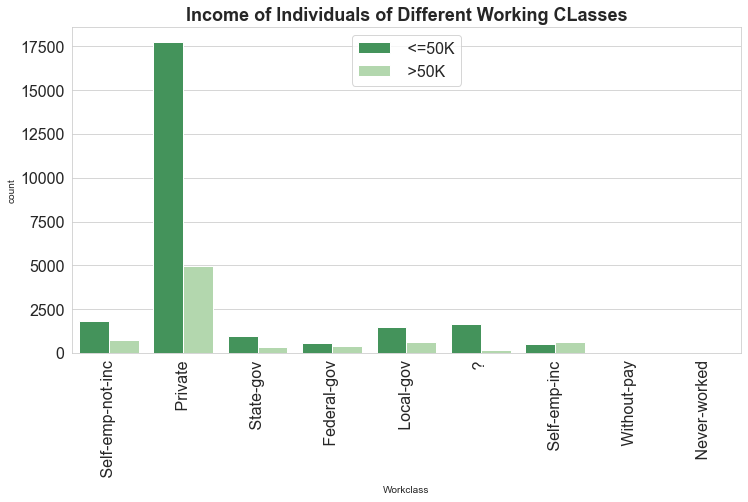

In [126]:
plt.figure(figsize=(12,6))

sns.countplot(df['Workclass'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


In [127]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['Age'].apply(age_group)

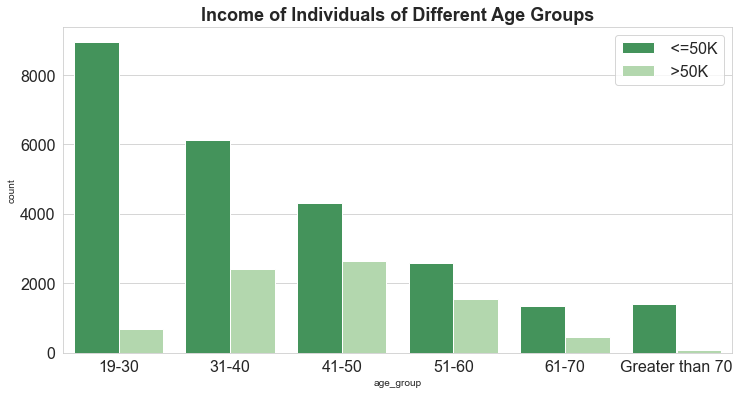

In [128]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

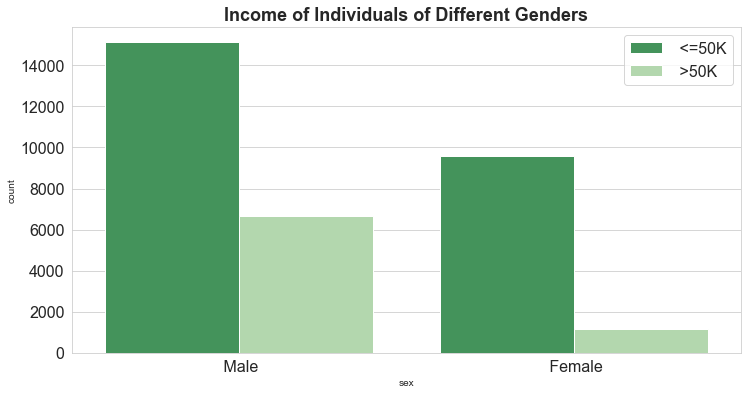

In [129]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['sex'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [130]:
numeric_features = ['Age','Fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income']

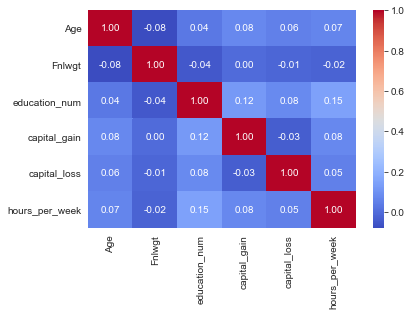

In [131]:
sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [132]:
del df['age_group']
df

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [133]:
a = df.iloc[:,[1,3,5,6,7,8,9,13]]
b = df.iloc[:,[0,2,4,10,11,12,14]]
a

,Workclass,Education,marital_status,occupation,relationship,race,sex,native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [134]:
b

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,50,83311,13,0,0,13,<=50K
1,38,215646,9,0,0,40,<=50K
2,53,234721,7,0,0,40,<=50K
3,28,338409,13,0,0,40,<=50K
4,37,284582,14,0,0,40,<=50K
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,<=50K
32556,40,154374,9,0,0,40,>50K
32557,58,151910,9,0,0,40,<=50K
32558,22,201490,9,0,0,20,<=50K


In [135]:
a_ohe = pd.get_dummies(a)
a_ohe.shape, b.shape

((32560, 102), (32560, 7))

In [136]:
c = pd.concat([b, a_ohe], axis = 1)

In [137]:
c

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,0,0,20,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [138]:
X = c.drop('income', axis = 1)
y = c['income']

In [139]:
X

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: income, Length: 32560, dtype: object

### Split data into training and test data.

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [142]:
print(y_train)

150       <=50K
26463     <=50K
16134     <=50K
4747      <=50K
8369       >50K
          ...  
13123     <=50K
19648     <=50K
9845      <=50K
10799     <=50K
2732      <=50K
Name: income, Length: 24420, dtype: object


In [143]:
print(X_test)


       Age  Fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
22278   40  193524             10             0             0              40   
8950    46  188027             10             0             0              45   
7838    33  202498              4             0             0              40   
16505   21  184756             10             0             0              16   
19140   59  106748              4             0             0              99   
...    ...     ...            ...           ...           ...             ...   
31549   47   88564              3             0             0              20   
4149    33  150570              9             0             0              40   
17168   40  374367             11             0             0              44   
21748   72   56559              9             0             0              12   
18155   29   59932             13             0             0              40   

       Workclass_ ?  Workcl

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
print(X_train)

[[-0.33671637  0.0774814  -0.41852807 ...  0.34288335 -0.04619466
  -0.02395056]
 [ 1.50131423 -1.2233263  -0.80581322 ...  0.34288335 -0.04619466
  -0.02395056]
 [-1.29249228 -0.01900693 -0.41852807 ...  0.34288335 -0.04619466
  -0.02395056]
 ...
 [ 0.32497465  1.15587921 -0.03124291 ...  0.34288335 -0.04619466
  -0.02395056]
 [-1.29249228 -1.43948496 -0.03124291 ...  0.34288335 -0.04619466
  -0.02395056]
 [ 0.76610199 -0.76693938 -0.03124291 ...  0.34288335 -0.04619466
  -0.02395056]]


In [146]:
print(X_test)

[[ 0.10441098  0.0330166  -0.03124291 ...  0.34288335 -0.04619466
  -0.02395056]
 [ 0.54553832 -0.01944594 -0.03124291 ...  0.34288335 -0.04619466
  -0.02395056]
 [-0.41023759  0.11866311 -2.35495386 ... -2.91644376 -0.04619466
  -0.02395056]
 ...
 [ 0.10441098  1.75895511  0.35604225 ...  0.34288335 -0.04619466
  -0.02395056]
 [ 2.45709014 -1.27415685 -0.41852807 ...  0.34288335 -0.04619466
  -0.02395056]
 [-0.70432249 -1.24196544  1.13061257 ...  0.34288335 -0.04619466
  -0.02395056]]


### Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [148]:
print(classifier.predict(sc.transform(X_train)))

[' >50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [149]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' >50K' ' <=50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
DT_accu=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))# missclassification
print("Desicion Tree Classifier Accuracy = ", DT_accu)

[[5385  808]
 [ 731 1216]]
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      6193
        >50K       0.60      0.62      0.61      1947

    accuracy                           0.81      8140
   macro avg       0.74      0.75      0.74      8140
weighted avg       0.81      0.81      0.81      8140

Desicion Tree Classifier Accuracy =  0.8109336609336609


### Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [152]:
print(classifier.predict(sc.transform(X_train)))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [153]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
RF_accu=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred)) # MISSCLASSIFICATION
print("Random forest Classifier Accuracy = ", RF_accu)

[[5774  419]
 [ 821 1126]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6193
        >50K       0.73      0.58      0.64      1947

    accuracy                           0.85      8140
   macro avg       0.80      0.76      0.77      8140
weighted avg       0.84      0.85      0.84      8140

Random forest Classifier Accuracy =  0.8476658476658476


### Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [156]:
print(classifier.predict(sc.transform(X_train)))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [157]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
LR_accu=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred)) #missclassification
print("logistic regression Classifier Accuracy = ", LR_accu)

[[5767  426]
 [ 779 1168]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      6193
        >50K       0.73      0.60      0.66      1947

    accuracy                           0.85      8140
   macro avg       0.81      0.77      0.78      8140
weighted avg       0.85      0.85      0.85      8140

logistic regression Classifier Accuracy =  0.851965601965602


### KNN Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [160]:
print(classifier.predict(sc.transform(X_train)))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


In [161]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))


[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_accu = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("knn Classifier Accuracy = ", KNN_accu)

[[5562  631]
 [ 860 1087]]
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6193
        >50K       0.63      0.56      0.59      1947

    accuracy                           0.82      8140
   macro avg       0.75      0.73      0.74      8140
weighted avg       0.81      0.82      0.81      8140

knn Classifier Accuracy =  0.8168304668304668


### SVC Classifier (with linear kernel)

In [163]:
# Importing SVM from sklearn
from sklearn.svm import SVC
svclassifier = SVC(kernel= 'linear')
svclassifier.fit(X_train,y_train)


SVC(kernel='linear')

In [164]:
# Using the X_test to predict the values
y_pred_SVM = svclassifier.predict(X_test)

In [165]:
# Calculating the Confusion Matrix and Accuracy_Score of the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix = ", cm)
print("*"*80)
# Classification Report
print(classification_report(y_test, y_pred_SVM)) # missclassification
print("*"*80)
SVM_accu = accuracy_score(y_test, y_pred_SVM)
print("SVM Classifier Accuracy = ", SVM_accu)

Confusion Matrix =  [[5791  402]
 [ 824 1123]]
********************************************************************************
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90      6193
        >50K       0.74      0.58      0.65      1947

    accuracy                           0.85      8140
   macro avg       0.81      0.76      0.78      8140
weighted avg       0.84      0.85      0.84      8140

********************************************************************************
SVM Classifier Accuracy =  0.8493857493857494


In [166]:
print("Decision Tree Classifier Accuracy = ", DT_accu)
print("Random Forest Classifier Accuracy = ", RF_accu)
print("KNN Classifier Accuracy = ", KNN_accu)
print("Logistic Regression Accuracy = ", LR_accu)
print("SVM Classifier Accuracy = ", SVM_accu)


Decision Tree Classifier Accuracy =  0.8109336609336609
Random Forest Classifier Accuracy =  0.8476658476658476
KNN Classifier Accuracy =  0.8168304668304668
Logistic Regression Accuracy =  0.851965601965602
SVM Classifier Accuracy =  0.8493857493857494


### conclusion:Logistic regression has performed better than others.